In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("benroshan/factors-affecting-campus-placement")
print("Path to dataset files:", path)

Path to dataset files: /Users/pyadav/.cache/kagglehub/datasets/benroshan/factors-affecting-campus-placement/versions/1


In [2]:
#======================================================
# Reusing packages from thinkstat2 
#======================================================
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import thinkstats2
import thinkplot
import scipy
import math

In [4]:
df = pd.read_csv(path + '/Placement_Data_Full_Class.csv')
print(df)

     sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0        1      M  67.00   Others  91.00   Others  Commerce     58.00   
1        2      M  79.33  Central  78.33   Others   Science     77.48   
2        3      M  65.00  Central  68.00  Central      Arts     64.00   
3        4      M  56.00  Central  52.00  Central   Science     52.00   
4        5      M  85.80  Central  73.60  Central  Commerce     73.30   
..     ...    ...    ...      ...    ...      ...       ...       ...   
210    211      M  80.60   Others  82.00   Others  Commerce     77.60   
211    212      M  58.00   Others  60.00   Others   Science     72.00   
212    213      M  67.00   Others  67.00   Others  Commerce     73.00   
213    214      F  74.00   Others  66.00   Others  Commerce     58.00   
214    215      M  62.00  Central  58.00   Others   Science     53.00   

      degree_t workex  etest_p specialisation  mba_p      status    salary  
0     Sci&Tech     No     55.0         Mkt&HR 

**Column Name with Description**  
__What variables means in dataset__
1.  sl_no    ~ Serial Number is integer record number
2.  gender   ~ Gender where code M is for male and F is for Female
3.  ssc_p    ~ 10th Grade Percentage
4.  ssc_b    ~ 10th Grade School Board. In india schools are affiliated to State of federal government education boards. Central is used for federal school board
5.  hsc_p    ~ 12th Grade Percentage
6.  hsc_b    ~ 12th Grade School Board. In india schools are affiliated to State of federal government education boards. Central is used for federal school board
7.  hsc_s    ~ 12th Grade specialisation. If student chose a Science (STEM), Arts (liberal arts) or Commerce (Accounting and Comptroller) specialization
8.  degree_p ~ UnderGrad Percentage
9.  degree_t ~ UnderGrad Specialization
10. workex   ~ Prior Work Experience. Yes means the student posses work experience before opting in for masters
11. etest_p  ~ Employability Test Percentage. Checks your readiness for employability. 
12. specialisation  ~  Gradudation ( MBA ) Specialization. Fin is for Finance and HR for Human Resources
13. mba_p    ~ MBA Percentage
14. status   ~ Status if placed in Job or not placed
15. salary   ~ Salary Offered if placed

  
In the dataset, I will utilize the percentages at each level ( 10th , 12, undergrad and grad) alongwith employability test to evaluate students performance at each level and check if the percentages in those tests correspond to the salary increase or increased your chances of placement. So the Variables SSC_P ( 10th Grade Percentage) , HSC_P ( 12th grade percentage ) Degree_P ( Undergrad Percentage ), estest_P ( employability test percentage) , MBA_P ( Graduation percentage ) and Salary alongwith status which will provide us the chances of a student getting placed in a job.

**Distribution of Variables**  
1. Create histograms for each variable going to be used in analysis.  
2. Proviode a summary statistics of the variables.  
3. Analyze and identify outliers and the reasoning for them being outliers.   
4. Handling the outliers.

In [145]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,job_offered,sex,wrkex,spec
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000,215.000000,215.000000,215.000000,215.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405,0.688372,0.646512,0.344186,0.441860
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420,0.464240,0.479168,0.476211,0.497767
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000,0.000000,0.000000,0.000000,0.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000,0.000000,0.000000,0.000000,0.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000,1.000000,1.000000,0.000000,0.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000,1.000000,1.000000,1.000000,1.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000,1.000000,1.000000,1.000000,1.000000


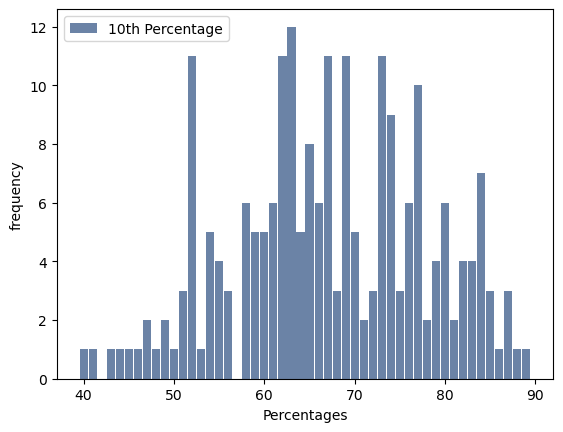

<Figure size 800x600 with 0 Axes>

In [8]:
import thinkplot
import thinkstats2
ssc_p = np.floor(df.ssc_p)
ssc_p = thinkstats2.Hist(ssc_p)
thinkplot.Hist(ssc_p, align = "center",label = '10th Percentage')
thinkplot.Show(xlabel='Percentages', ylabel='frequency',loc='upper left')

In [141]:
#Stats for ssc_p ( 10th Grade percentage points ) 

#mean 
mean = df.ssc_p.mean() 

#median
median = df.ssc_p.median()

#Variance
var = df.ssc_p.var()

#std dev
std  = df.ssc_p.std()

print(f" Mean {mean}, median {median}, Variance {var}, std deviation {std}")

 Mean 67.30339534883721, median 67.0, Variance 117.22837673549229, std deviation 10.827205398231452


In [10]:
# Try to find outliers in lowest percentages 
ssc_p = np.floor(df.ssc_p)
ssc_p = thinkstats2.Hist(ssc_p)
for ssc_p , freq in ssc_p.Smallest(10):
     print(ssc_p, freq)

40.0 1
41.0 1
43.0 1
44.0 1
45.0 1
46.0 1
47.0 2
48.0 1
49.0 2
50.0 1


In [11]:
# Try to find outliers in highest percentages 
ssc_p = np.floor(df.ssc_p)
ssc_p = thinkstats2.Hist(ssc_p)
for ssc_p , freq in ssc_p.Largest(10):
     print(ssc_p, freq)

89.0 1
88.0 1
87.0 3
86.0 1
85.0 3
84.0 7
83.0 4
82.0 4
81.0 2
80.0 6


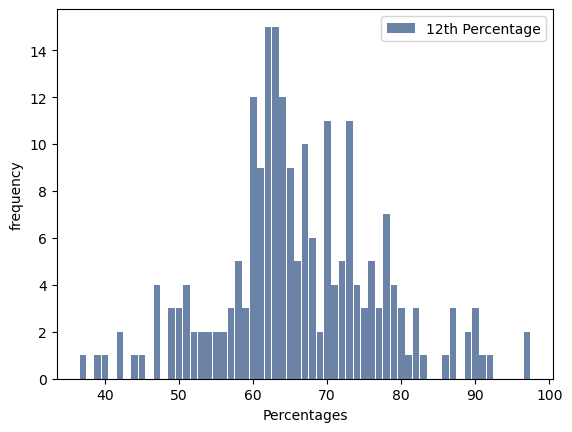

<Figure size 800x600 with 0 Axes>

In [12]:
hsc_p = np.floor(df.hsc_p)
hsc_p = thinkstats2.Hist(hsc_p)
thinkplot.Hist(hsc_p, align = "center",label = '12th Percentage')
thinkplot.Show(xlabel='Percentages', ylabel='frequency')

In [13]:
#Stats for hsc_p ( 12th Grade percentage points ) 
#mean 
mean = df.hsc_p.mean() 

#median
median = df.hsc_p.median()

#Variance
var = df.hsc_p.var()

#std dev
std  = df.hsc_p.std()

print(f" Mean {mean}, median {median}, Variance {var}, std deviation {std}")

 Mean 66.33316279069768, median 65.0, Variance 118.75570583786134, std deviation 10.89750915750298


In [14]:
# Try to find outliers in lowest percentages 
hsc_p = np.floor(df.hsc_p)
hsc_p = thinkstats2.Hist(hsc_p)
for hsc_p , freq in hsc_p.Smallest(10):
     print(hsc_p, freq)

37.0 1
39.0 1
40.0 1
42.0 2
44.0 1
45.0 1
47.0 4
49.0 3
50.0 3
51.0 4


In [15]:
# Try to find outliers in highest percentages 
hsc_p = np.floor(df.hsc_p)
hsc_p = thinkstats2.Hist(hsc_p)
for hsc_p , freq in hsc_p.Largest(10):
     print(hsc_p, freq)

97.0 2
92.0 1
91.0 1
90.0 3
89.0 2
87.0 3
86.0 1
83.0 1
82.0 3
81.0 1


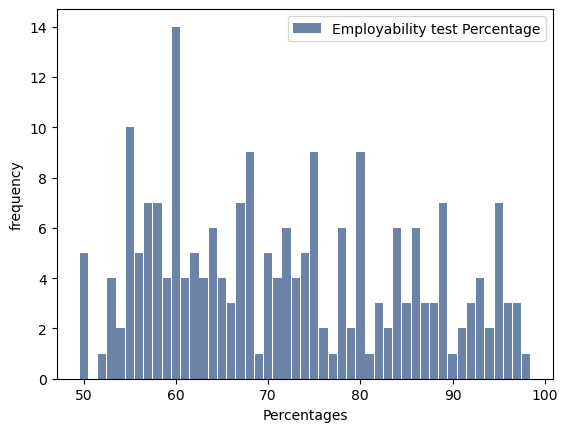

<Figure size 800x600 with 0 Axes>

In [16]:
etest_p = np.floor(df.etest_p)
etest_p = thinkstats2.Hist(etest_p)
thinkplot.Hist(etest_p, align = "center",label = 'Employability test Percentage')
# plt.hist(etest_p,histtype='bar', bins = 10, width = 4.5)
thinkplot.Show(xlabel='Percentages', ylabel='frequency')

In [143]:
#Stats for etest_p ( 12th Grade percentage points ) 
#mean 
mean = df.etest_p.mean() 

#median
median = df.etest_p.median()

#Variance
var = df.etest_p.var()

#std dev
std  = df.etest_p.std()

print(f" Mean {mean}, median {median}, Variance {var}, std deviation {std}")

 Mean 72.10055813953488, median 71.0, Variance 176.25101837861345, std deviation 13.275956401653835


In [18]:
# Try to find outliers in lowest percentages 
etest_p = np.floor(df.etest_p)
etest_p = thinkstats2.Hist(etest_p)
for etest_p , freq in etest_p.Smallest(10):
     print(etest_p, freq)

50.0 5
52.0 1
53.0 4
54.0 2
55.0 10
56.0 5
57.0 7
58.0 7
59.0 4
60.0 14


In [19]:
# Try to find outliers in highest percentages 
etest_p = np.floor(df.etest_p)
etest_p = thinkstats2.Hist(etest_p)
for etest_p , freq in etest_p.Largest(10):
     print(etest_p, freq)

98.0 1
97.0 3
96.0 3
95.0 7
94.0 2
93.0 4
92.0 3
91.0 2
90.0 1
89.0 7


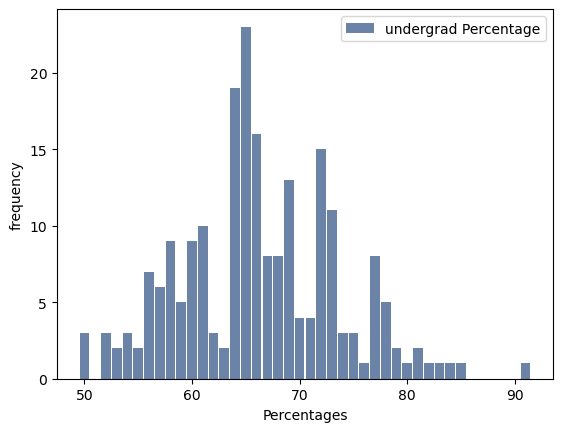

<Figure size 800x600 with 0 Axes>

In [20]:
degree_p = np.floor(df.degree_p)
degree_p = thinkstats2.Hist(degree_p)
thinkplot.Hist(degree_p, align = "center",label = 'undergrad Percentage')
thinkplot.Show(xlabel='Percentages', ylabel='frequency')

In [151]:
#Stats for degree_p ( Undergrad percentage points ) 
#mean 
mean = df.degree_p.mean() 

#median
median = df.degree_p.median()

#Variance
var = df.degree_p.var()

#std dev
std  = df.degree_p.std()

print(f" Mean {mean}, median {median}, Variance {var}, std deviation {std}")

 Mean 66.37018604651163, median 66.0, Variance 54.15110276896324, std deviation 7.358743287339438


In [22]:
# Try to find outliers in highest percentages 
degree_p = np.floor(df.degree_p)
degree_p = thinkstats2.Hist(degree_p)
for degree_p , freq in degree_p.Largest(10):
     print(degree_p, freq)

91.0 1
85.0 1
84.0 1
83.0 1
82.0 1
81.0 2
80.0 1
79.0 2
78.0 5
77.0 8


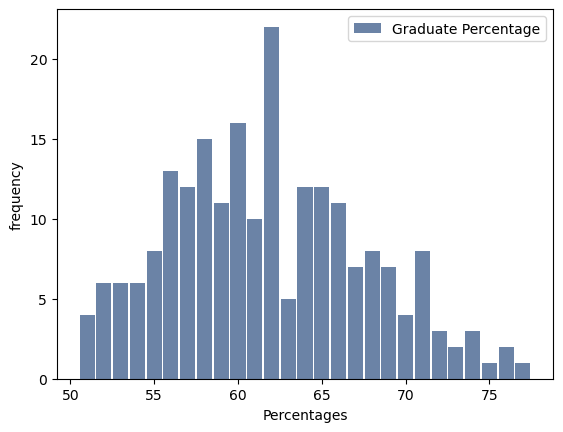

<Figure size 800x600 with 0 Axes>

In [23]:
mba_p = np.floor(df.mba_p)
mba_p = thinkstats2.Hist(mba_p)
thinkplot.Hist(mba_p, align = "center",label = 'Graduate Percentage')
thinkplot.Show(xlabel='Percentages', ylabel='frequency')

In [153]:
#Stats for mba_p ( Graduate percentage points ) 
#mean 
mean = df.mba_p.mean() 

#median
median = df.mba_p.median()

#Variance
var = df.mba_p.var()

#std dev
std  = df.mba_p.std()

print(f" Mean {mean}, median {median}, Variance {var}, std deviation {std}")

 Mean 62.278186046511635, median 62.0, Variance 34.02837566615952, std deviation 5.8333845806838


In [25]:
# Try to find outliers in highest percentages 
mba_p = np.floor(df.mba_p)
mba_p = thinkstats2.Hist(mba_p)
for mba_p , freq in mba_p.Largest(10):
     print(mba_p, freq)

77.0 1
76.0 2
75.0 1
74.0 3
73.0 2
72.0 3
71.0 8
70.0 4
69.0 7
68.0 8


In [26]:
# Create some new variable for slicing and dicing of dataset
df['job_offered'] = (df['status'] == 'Placed').astype(int) # if a student is placed, 1 else 0
df['sex'] = (df['gender'] == 'M').astype(int) # 1 for male and 0 for female
df['wrkex'] = (df['workex'] == 'Yes').astype(int) # Did student possess prior work experience, 1 for yes, 0 for no
df['spec'] = (df['specialisation'] == 'Mkt&HR').astype(int) # if MBa is specialized in HR then 1, finance will end up with 0
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,job_offered,sex,wrkex,spec
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0,1,1,0,1
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0,1,1,1,0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0,1,1,0,0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN,0,1,0,1
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0,1,1,0,0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0,1,1,0,0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0,1,1,1,0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0,1,0,0,1


**PMF**

__Using pg. 29 of your text as an example, compare two scenarios in your data using a
PMF. Reminder, this isn’t comparing two variables against each other – it is the same
variable, but a different scenario. Almost like a filter. The example in the book is first
babies compared to all other babies, it is still the same variable, but breaking the data
out based on criteria we are exploring (Chapter 3).__

In [28]:
#divide the data based on placed and non placed
offered = df[df.job_offered == 1]
notoffered = df[df.job_offered == 0]
males_pct = df[df.sex == 1]
fmales_pct = df[df.sex == 0]
male_offered = offered[offered.sex == 1]
female_offered = offered[offered.sex == 0]

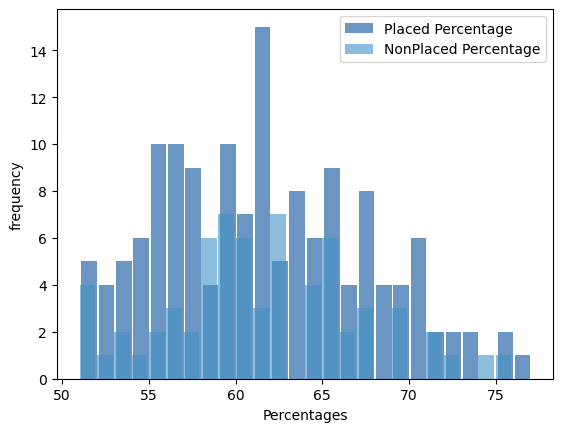

<Figure size 800x600 with 0 Axes>

In [29]:
mba_p = np.floor(offered.mba_p)
mba_p_hist = thinkstats2.Hist(mba_p)
notmba_p = np.floor(notoffered.mba_p)
notmba_p_hist = thinkstats2.Hist(notmba_p)
width= 0.1
bin = 10
thinkplot.PrePlot(2)
thinkplot.Hist(mba_p_hist, align = "right",label = 'Placed Percentage')
thinkplot.Hist(notmba_p_hist, align = "left",label = 'NonPlaced Percentage')
thinkplot.Show(xlabel='Percentages', ylabel='frequency')

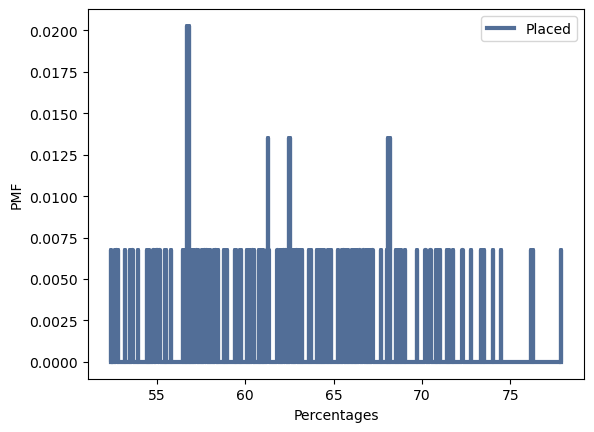

In [30]:
pmf_placed = thinkstats2.Pmf(offered.mba_p, label= 'Placed')
pmf_placed.Total()
thinkplot.Pmf(pmf_placed)
# plt.hist(etest_p,histtype='bar', bins = 10, width = 4.5)
thinkplot.Config(xlabel="Percentages", ylabel="PMF")

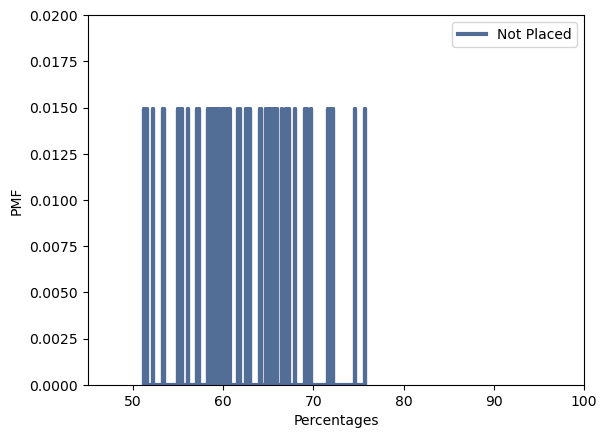

In [31]:
pmf_notplaced = thinkstats2.Pmf(notoffered.mba_p,label= 'Not Placed')
pmf_notplaced.Total()
thinkplot.Pmf(pmf_notplaced)
# plt.hist(etest_p,histtype='bar', bins = 10, width = 4.5)
thinkplot.Config(xlabel="Percentages", ylabel="PMF", axis=[45,100,0,0.02])

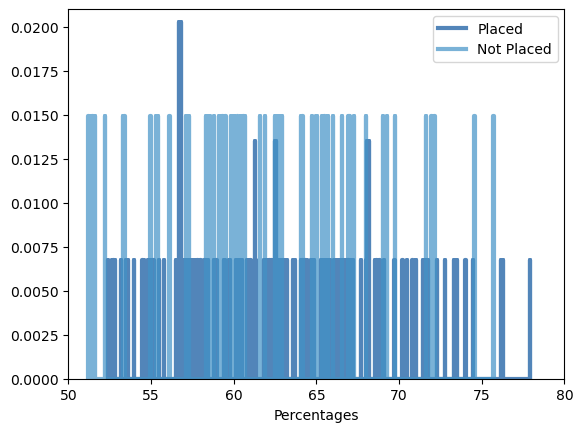

<Figure size 800x600 with 0 Axes>

In [32]:
thinkplot.PrePlot(2)
# thinkplot.SubPlot(2)
thinkplot.Pmfs([pmf_placed,pmf_notplaced])
thinkplot.Show(xlabel='Percentages',axis = [50,80,0,0.021])

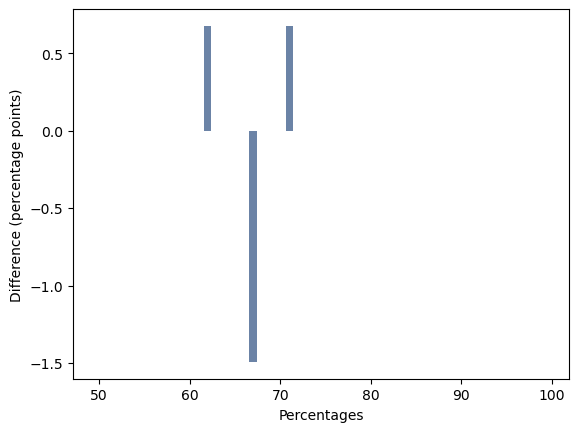

In [33]:
Percentages = range(50, 100)
diffs = []
for Pct in Percentages:
    p1 = pmf_placed.Prob(Pct)
    p2 = pmf_notplaced.Prob(Pct)
    diff = 100 * (p1 - p2)
    diffs.append(diff)

thinkplot.Bar(Percentages, diffs)
thinkplot.Config(xlabel='Percentages', ylabel='Difference (percentage points)')


**CDF**

__Create 1 CDF with one of your variables, using page 41-44 as your guide, what does this
tell you about your variable and how does it address the question you are trying to
answer (Chapter 4).__

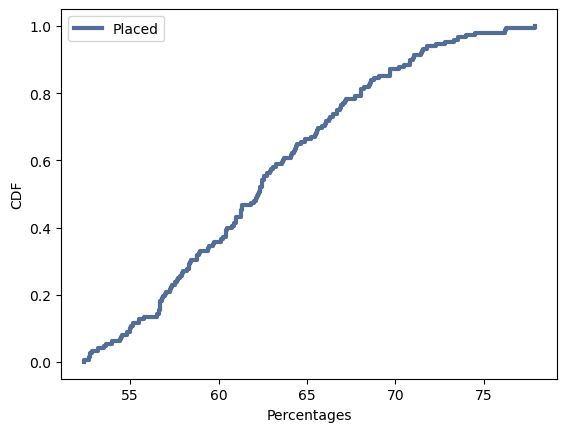

In [35]:
cdf = thinkstats2.Cdf(offered.mba_p, label= 'Placed')
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Percentages', ylabel='CDF', loc='upper left')

In [36]:
cdf.Prob(80)

1.0

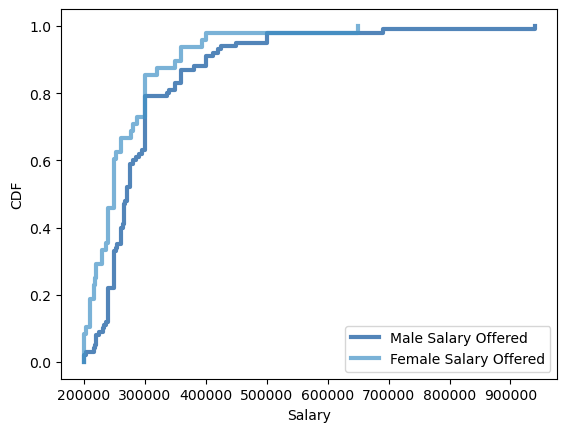

In [37]:
male_cdf = thinkstats2.Cdf(male_offered.salary, label='Male Salary Offered')
female_cdf = thinkstats2.Cdf(female_offered.salary, label='Female Salary Offered')

thinkplot.PrePlot(2)
thinkplot.Cdfs([male_cdf, female_cdf])
thinkplot.Config(xlabel='Salary', ylabel='CDF', loc='lower right')

In [38]:
print(f" Salary of female at 80% is {female_cdf.Value(0.8)} which is less than male salary of {male_cdf.Value(0.8)} ")

 Salary of female at 80% is 300000.0 which is less than male salary of 336000.0 


__Plot 1 analytical distribution and provide your analysis on how it applies to the dataset
you have chosen (Chapter 5).__

n, mean, std 148 5.442426322192734 0.09728963736742312


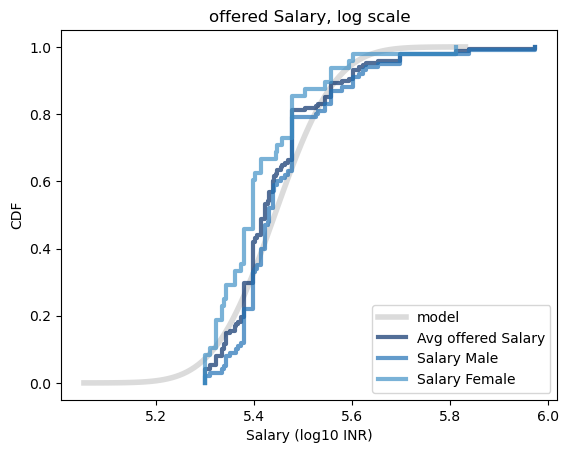

In [40]:
# log normal distribution suits best for salaries.
log_offered = np.log10(offered.salary)
log_male = np.log10(male_offered.salary)
log_female = np.log10(female_offered.salary)

mean, var = thinkstats2.TrimmedMeanVar(log_offered)
std = np.sqrt(var)
print("n, mean, std", len(log_offered), mean, std)

xmin = mean - 4 * std
xmax = mean + 4 * std
xs, ps = thinkstats2.RenderNormalCdf(mean, std, xmin, xmax)
thinkplot.Plot(xs, ps, label="model", linewidth=4, color="0.8")

cdf_off = thinkstats2.Cdf(log_offered, label="Avg offered Salary")
cdf_male = thinkstats2.Cdf(log_male, label="Salary Male")
cdf_fmale = thinkstats2.Cdf(log_female, label="Salary Female")
thinkplot.Cdf(cdf_off)
thinkplot.Cdf(cdf_male)
thinkplot.Cdf(cdf_fmale)
thinkplot.Config(
    title="offered Salary, log scale",
    xlabel="Salary (log10 INR)",
    ylabel="CDF",
    loc="lower right",
)

__Create two scatter plots comparing two variables and provide your analysis on
correlation and causation. Remember, covariance, Pearson’s correlation, and NonLinear Relationships should also be considered during your analysis (Chapter 7).__

In [42]:
# From thinknstat 2
def SampleRows(df, nrows, replace=False):
    indices = np.random.choice(df.index, nrows, replace=replace)
    sample = df.loc[indices]
    return sample

In [43]:
# From thinknstat 2
def SpearmanCorr(xs, ys):
    xs = pd.Series(xs)
    ys = pd.Series(ys)
    return xs.corr(ys, method='spearman')

In [44]:
# From thinknstat 2
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

In [45]:
# From thinknstat 2
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

In [155]:
df_sal = df.dropna()
sample = SampleRows(df_sal,100)
mba, salary = sample.mba_p, sample.salary
etest, salary = sample.etest_p, sample.salary

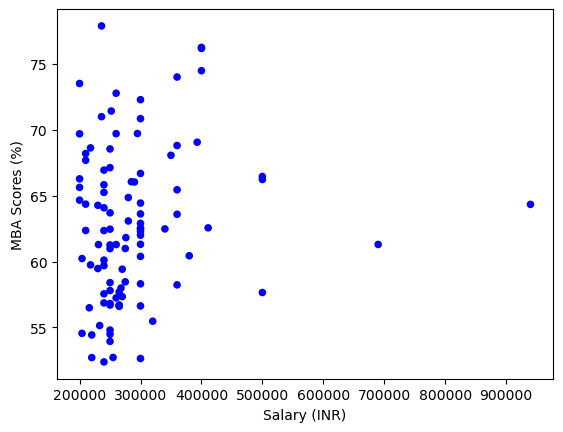

In [47]:
thinkplot.Scatter(salary, mba, alpha=1)
thinkplot.Config(xlabel='Salary (INR)',
                 ylabel='MBA Scores (%)',
                 # axis=[0,100,0,100],
                 legend=False)

In [48]:
print(f"""The coefficient of Pearsons correlation between salary and MBA score is just {Corr(salary, mba)*100} % 
whereas the Spearmans correlation which works better with outliers is {SpearmanCorr(salary, mba)*100} %""")

The coefficient of Pearsons correlation between salary and MBA score is just 14.335051140220836 % 
whereas the Spearmans correlation which works better with outliers is 13.95459757761484 %


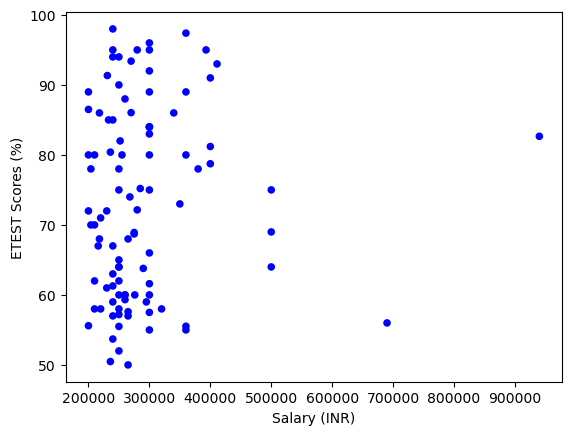

In [49]:
thinkplot.Scatter(salary, etest, alpha=1)
thinkplot.Config(xlabel='Salary (INR)',
                 ylabel='ETEST Scores (%)',
                 # axis=[0,100,0,100],
                 legend=False)

In [50]:
print(f"""The coefficient of Pearsons correlation between salary and MBA score is just {Corr(salary, etest)*100} % 
whereas the Spearmans correlation which works better with outliers is {SpearmanCorr(salary, etest)*100} %""")

The coefficient of Pearsons correlation between salary and MBA score is just 8.945826012057486 % 
whereas the Spearmans correlation which works better with outliers is 12.39126693704642 %


In [51]:
# check if relationship is linear or nonlinear
bins = np.arange(0, 100, 5)
indices = np.digitize(df_sal.mba_p, bins)
groups = df_sal.groupby(indices)

In [52]:
for i, group in groups:
    print(i, len(group))

11 14
12 39
13 45
14 31
15 16
16 3


In [53]:
mean_pct = [group.mba_p.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.salary) for i, group in groups]

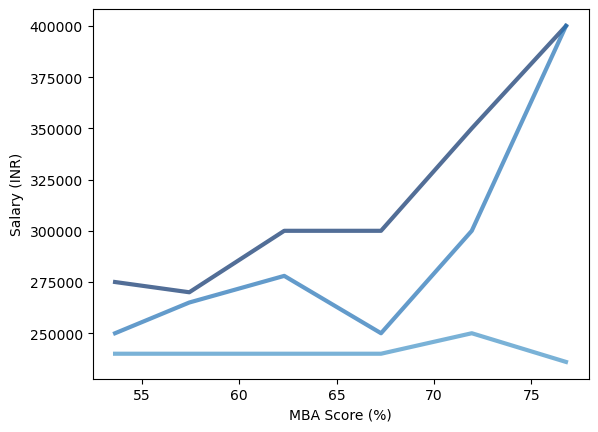

In [193]:
for percent in [75, 50, 25]:
    salary_percentiles = [cdf.Percentile(percent) for cdf in cdfs]
    thinkplot.Plot(mean_pct, salary_percentiles, label = f" {percent}th  % percent")
    thinkplot.Config(xlabel='MBA Score (%)',
                 ylabel='Salary (INR)',
                 loc="top left",
                 # axis=[50, 100, 200000, 900000],
                 legend=False)

In [341]:
class SlopeTest(thinkstats2.HypothesisTest):
    def TestStatistic(self, data):
          mba_p, salary = data
          _, slope = thinkstats2.LeastSquares(mba_p, salary)
          return slope
    
    def MakeModel(self):
          _, salary = self.data
          self.ybar = salary.mean()
          self.res = salary - self.ybar

    def RunModel(self):
          mba_p, _ = self.data
          salary   = self.ybar + np.random.permutation(self.res)
          return mba_p, salary


ht = SlopeTest((sample.mba_p, sample.salary))
pvalue = ht.PValue()
print(f" The p-value for the test is {pvalue} which is not significant ")

 The p-value for the test is 0.099 which is not significant 


__Conduct a test on your hypothesis using one of the methods covered in chapter 9.__

In [56]:
class CorrelationPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(Corr(xs, ys))
        return test_stat

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys

In [57]:
class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

In [346]:
data = df_sal.degree_p.values, df_sal.salary.values
ht = CorrelationPermute(data)
pvalue = ht.PValue()
print(f"""As the pvalue is {pvalue} which is greater than 0.05, means this correlation is not statistically significant, hence
  null hypothesis holds, infering there is no significant correlation between salary & graduate degree percentage """) 

As the pvalue is 0.824 which is greater than 0.05, means this correlation is not statistically significant, hence
  null hypothesis holds, infering there is no significant correlation between salary & graduate degree percentage 


In [344]:
data = df_sal.hsc_p.values, df_sal.salary.values
ht = CorrelationPermute(data)
pvalue = ht.PValue()
print(f"""As the pvalue is {pvalue} which is greater than 0.05, means this correlation is not statistically significant, hence null hypothesis
      holds, infering there is no significant correlation between salary & 12th grade scores """) 

As the pvalue is 0.342 which is greater than 0.05, means this correlation is not statistically significant, hence null hypothesis
      holds, infering there is no significant correlation between salary & 12th grade scores 


In [60]:
data = df_sal.mba_p.values, df_sal.salary.values
ht = CorrelationPermute(data)
pvalue = ht.PValue()
print(f"""As the permutation value is {pvalue} which is less than 0.05, means this correlation is statistically significant, hence null hypothesis
      does not holds, infering there is a significant correlation between salary & MBA scores """) 

As the permutation value is 0.034 which is less than 0.05, means this correlation is statistically significant, hence null hypothesis
      does not holds, infering there is a significant correlation between salary & MBA scores 


In [61]:
data = df_sal.etest_p.values, df_sal.salary.values
ht = CorrelationPermute(data)
pvalue = ht.PValue()
print(f"""As the permutation value is {pvalue} which is less than 0.05, means this correlation is statistically significant, hence 
  null hypothesis does not holds, infering there is a significant correlation between salary & Employability test scores """) 

As the permutation value is 0.026 which is less than 0.05, means this correlation is statistically significant, hence 
  null hypothesis does not holds, infering there is a significant correlation between salary & Employability test scores 


In [62]:

def RunTests(df, iters=150):
    """
    df: DataFrame
    iters: how many iterations to run
    """
    n = len(df)
    placed = df[df.job_offered == 1]
    notplaced = df[df.job_offered != 1]

    # compare MBA Scores
    data = placed.mba_p.values, notplaced.mba_p.values
    ht = DiffMeansPermute(data)
    p1 = ht.PValue(iters=iters)

    data = (placed.mba_p.dropna().values,
            notplaced.mba_p.dropna().values)
    ht = DiffMeansPermute(data)
    p2 = ht.PValue(iters=iters)

    # test correlation
    sal_df = df.dropna(subset=['salary', 'mba_p'])
    data = sal_df.salary.values, sal_df.mba_p.values
    ht = CorrelationPermute(data)
    p3 = ht.PValue(iters=iters)

    print('%d\t%0.2f\t%0.2f\t%0.2f' % (n, p1, p2, p3))

In [63]:
n = len(df)
for _ in range(7):
    sample = thinkstats2.SampleRows(df, n)
    RunTests(sample)
    n //= 2

215	0.24	0.26	0.04
107	0.19	0.26	0.07
53	0.25	0.28	0.05
26	0.59	0.62	0.24
13	0.63	0.67	0.01
6	0.38	0.40	0.79
3	0.63	0.69	1.00


__For this project, conduct a regression analysis on either one dependent and one explanatory variable, or multiple explanatory variables (Chapter 10 & 11).__

In [65]:
import statsmodels.formula.api as smf

formula = 'salary ~ mba_p'
model = smf.ols(formula, data=df_sal)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     4.613
Date:                Sun, 02 Mar 2025   Prob (F-statistic):             0.0334
Time:                        18:52:46   Log-Likelihood:                -1901.1
No. Observations:                 148   AIC:                             3806.
Df Residuals:                     146   BIC:                             3812.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.147e+05   8.13e+04      1.410      0.161    -4.6e+04    2.75e+05
mba_p       2779.5111   1294.097      2.148      0.033     221.929    5337.093
==============================================================================
Omnibus:                      143.592   Durbin-Watson:                   2.194
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2394.345
Skew:                           3.523   Prob(JB):                         0.00
Kurtosis:                      21.402   Cond. No.                         674.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
formula = 'np.log10(salary) ~ mba_p'
model = smf.ols(formula, data=df_sal)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       np.log10(salary)   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     5.345
Date:                Sun, 02 Mar 2025   Prob (F-statistic):             0.0222
Time:                        18:52:46   Log-Likelihood:                 123.95
No. Observations:                 148   AIC:                            -243.9
Df Residuals:                     146   BIC:                            -237.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.2312      0.093     56.318      0.000       5.048       5.415
mba_p          0.0034      0.001      2.312      0.022       0.000       0.006
==============================================================================
Omnibus:                       64.058   Durbin-Watson:                   2.181
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              214.766
Skew:                           1.663   Prob(JB):                     2.31e-47
Kurtosis:                       7.875   Cond. No.                         674.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
import patsy

def GoMining(df):
    """Searches for variables that predict Salary.

    df: DataFrame of records

    returns: list of (rsquared, variable name) pairs
    """
    variables = []
    for name in df.columns:
        try:
            if df[name].var() < 1e-7:
                continue

            formula = 'np.log10(salary) ~ mba_p + ' + name
            model = smf.ols(formula, data=df)
            if model.nobs < len(df)/2:
                continue

            results = model.fit()
        except (ValueError, TypeError, patsy.PatsyError) as e:
            continue
        
        variables.append((results.rsquared, name))

    return variables

In [68]:
variables = GoMining(df_sal)
variables

[(0.04097726602932916, 'sl_no'),
 (0.03534911891184722, 'ssc_p'),
 (0.036105616462778545, 'hsc_p'),
 (0.047905477604351265, 'degree_p'),
 (0.061062513890047354, 'etest_p'),
 (0.03531688784360465, 'mba_p'),
 (0.9358022816961635, 'salary'),
 (0.09867731761585752, 'sex'),
 (0.0428092173986343, 'wrkex'),
 (0.04858119591136478, 'spec')]

In [69]:
# Other than Salary, the highest R2 is for Sex. Spec, workex and etest also shows high R2 values but does not impact the results 
# significantly.
formula = 'np.log10(salary) ~ mba_p + sex '
model = smf.ols(formula, data=df_sal)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       np.log10(salary)   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     7.937
Date:                Sun, 02 Mar 2025   Prob (F-statistic):           0.000536
Time:                        18:52:46   Log-Likelihood:                 128.98
No. Observations:                 148   AIC:                            -252.0
Df Residuals:                     145   BIC:                            -243.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.1203      0.097     53.025      0.000       4.929       5.311
mba_p          0.0046      0.001      3.082      0.002       0.002       0.007
sex            0.0591      0.019      3.193      0.002       0.023       0.096
==============================================================================
Omnibus:                       66.383   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              230.232
Skew:                           1.717   Prob(JB):                     1.01e-50
Kurtosis:                       8.054   Cond. No.                         724.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
sample = SampleRows(df_sal,100)
predicted_logsal = results.predict(sample)
norm_pred_salary = 10 ** predicted_logsal

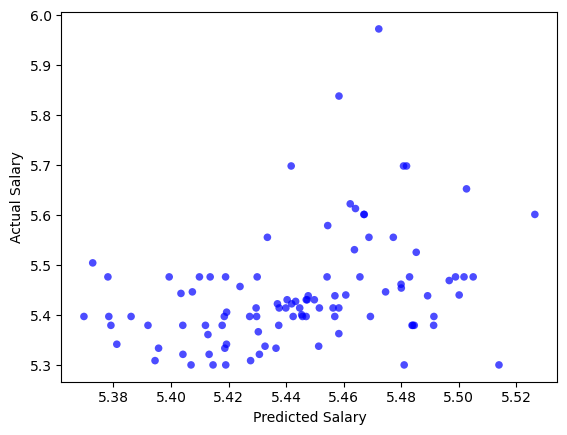

In [71]:
act_sal = np.log10(sample['salary'])
thinkplot.Scatter(predicted_logsal, act_sal, alpha=0.7)
thinkplot.Plot(act_sal.mean(), act_sal.mean(), color = 'green')
thinkplot.Config(xlabel='Predicted Salary',
                 ylabel='Actual Salary',
                 # axis=[0,100,0,100],
                 legend=False)

n, mean, std 100 5.43969961963888 0.09872903640160759


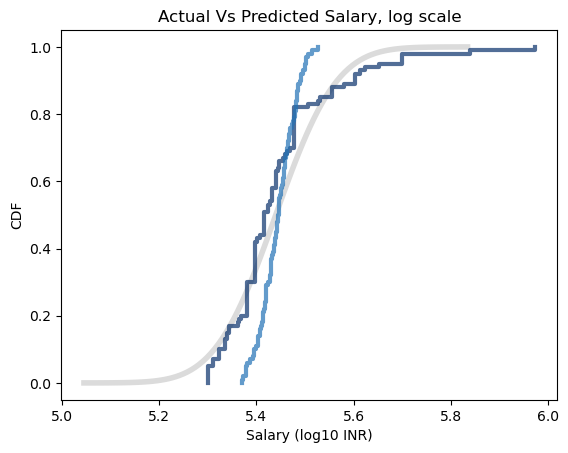

In [350]:
# CDF of predicted values vs actual

mean, var = thinkstats2.TrimmedMeanVar(act_sal)
std = np.sqrt(var)
print("n, mean, std", len(act_sal), mean, std)

xmin = mean - 4 * std
xmax = mean + 4 * std
xs, ps = thinkstats2.RenderNormalCdf(mean, std, xmin, xmax)
thinkplot.Plot(xs, ps, label="model", linewidth=4, color="0.8")

cdf_act = thinkstats2.Cdf(act_sal, label="Actual Salary")
cdf_pred = thinkstats2.Cdf(predicted_logsal, label="Predicted Salary")

thinkplot.Cdf(cdf_act)
thinkplot.Cdf(cdf_pred)

thinkplot.Config(
    title="Actual Vs Predicted Salary, log scale",
    xlabel="Salary (log10 INR)",
    ylabel="CDF",
    loc="lower right",
)